In [19]:
## California Data Total Crime

library(dplyr)
library(readr)
dset <- read_csv("Crimes_and_Clearances_with_Arson-1985-2018.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  County = col_character(),
  NCICCode = col_character()
)
See spec(...) for full column specifications.


In [20]:
dsetnew <- filter(dset, Year >= 2010 & Year <= 2018)
head(dsetnew)

Year,County,NCICCode,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum,Property_sum,Burglary_sum,⋯,MVLARnao_sum,MVPLARnao_sum,BILARnao_sum,FBLARnao_sum,COMLARnao_sum,AOLARnao_sum,LT400nao_sum,LT200400nao_sum,LT50200nao_sum,LT50nao_sum
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,Fresno County,CA Highway Patrol - Fresno,1,0,0,0,1,217,1,⋯,0,23,0,0,0,0,0,0,0,23
2011,Fresno County,CA Highway Patrol - Fresno,3,0,0,0,3,194,2,⋯,2,30,0,0,0,0,0,0,0,32
2012,Fresno County,CA Highway Patrol - Fresno,2,0,0,1,1,212,0,⋯,0,25,0,0,0,0,0,0,0,25
2013,Fresno County,CA Highway Patrol - Fresno,0,0,0,0,0,242,0,⋯,5,26,0,0,0,0,0,0,0,31
2014,Fresno County,CA Highway Patrol - Fresno,0,0,0,0,0,148,0,⋯,0,13,0,0,0,1,0,0,0,14
2015,Fresno County,CA Highway Patrol - Fresno,0,0,0,0,0,212,0,⋯,0,21,0,0,0,0,0,0,0,21


In [21]:
grouped_by_year <- dsetnew %>% group_by(Year) %>% summarise_at(vars(Violent_sum, Property_sum), sum)

## Total Crime by Year

In [22]:
grouped_by_year$allcrime <- grouped_by_year$Violent_sum + grouped_by_year$Property_sum
head(grouped_by_year)

Year,Violent_sum,Property_sum,allcrime
<dbl>,<dbl>,<dbl>,<dbl>
2010,163957,981523,1145480
2011,155313,974666,1129979
2012,160629,1048764,1209393
2013,151634,1018333,1169967
2014,151425,946682,1098107
2015,166588,1023828,1190416


In [23]:
library(ggplot2)
require(ggplot2)
theme_set(theme_minimal())

Saving 6.67 x 6.67 in image


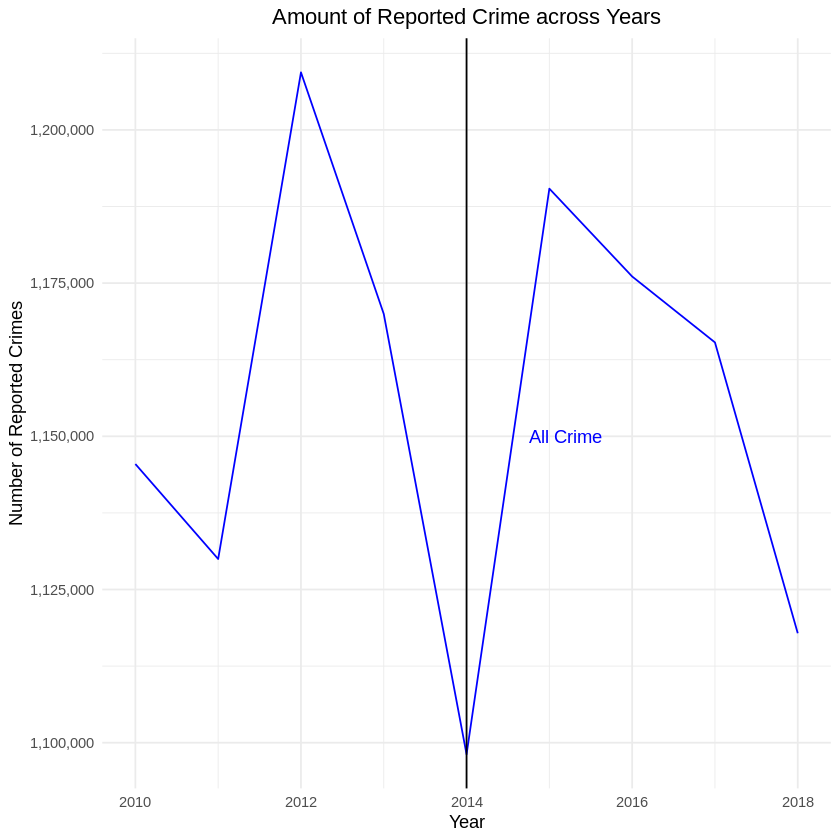

In [24]:
p = ggplot() +
    geom_line(data = grouped_by_year, aes(x = Year, y = allcrime), color = "blue") +
    ggtitle("Amount of Reported Crime across Years") +
    geom_text(aes(x = 2015.2), y= 1150000, label = "All Crime", color = "blue") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Reported Crimes')

require(scales)
p + scale_y_continuous(labels = comma)

ggsave("totalcrime.png")

## Amount of Violent and Nonviolent (Property) Crimes##

In [25]:
head(grouped_by_year)

Year,Violent_sum,Property_sum,allcrime
<dbl>,<dbl>,<dbl>,<dbl>
2010,163957,981523,1145480
2011,155313,974666,1129979
2012,160629,1048764,1209393
2013,151634,1018333,1169967
2014,151425,946682,1098107
2015,166588,1023828,1190416


Saving 6.67 x 6.67 in image


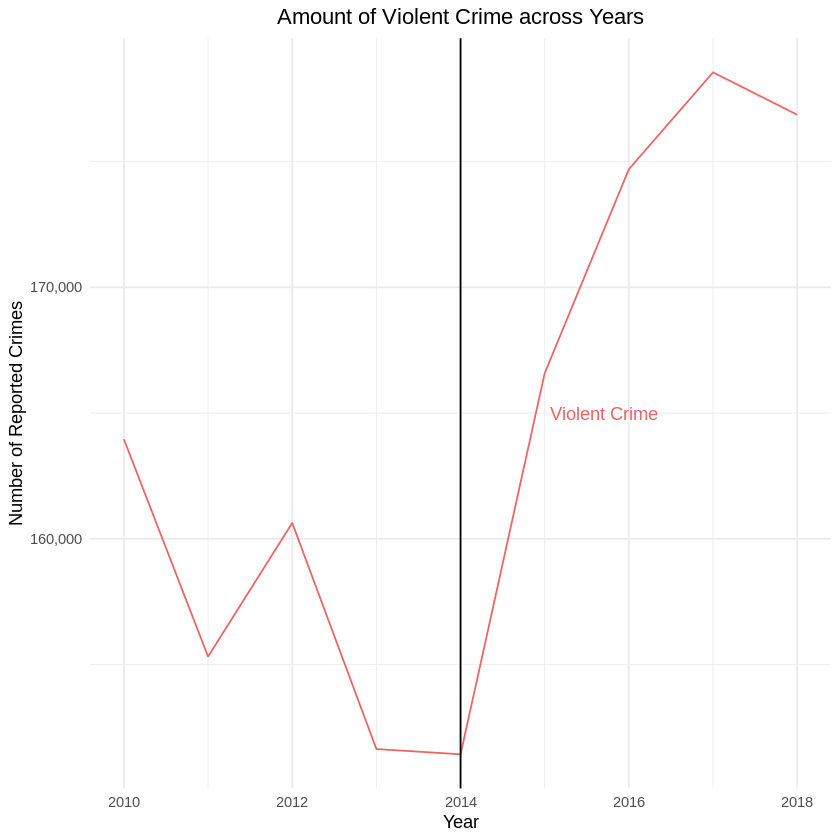

In [26]:
q = ggplot() +
    geom_line(data = grouped_by_year, aes(x = Year, y = Violent_sum), color = "indianred2") +
    ggtitle("Amount of Violent Crime across Years") +
    geom_text(aes(x = 2015.7), y= 165000, label = "Violent Crime", color = "indianred2") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Reported Crimes')

require(scales)
q + scale_y_continuous(labels = comma)

ggsave("violentcrime.png")

Saving 6.67 x 6.67 in image


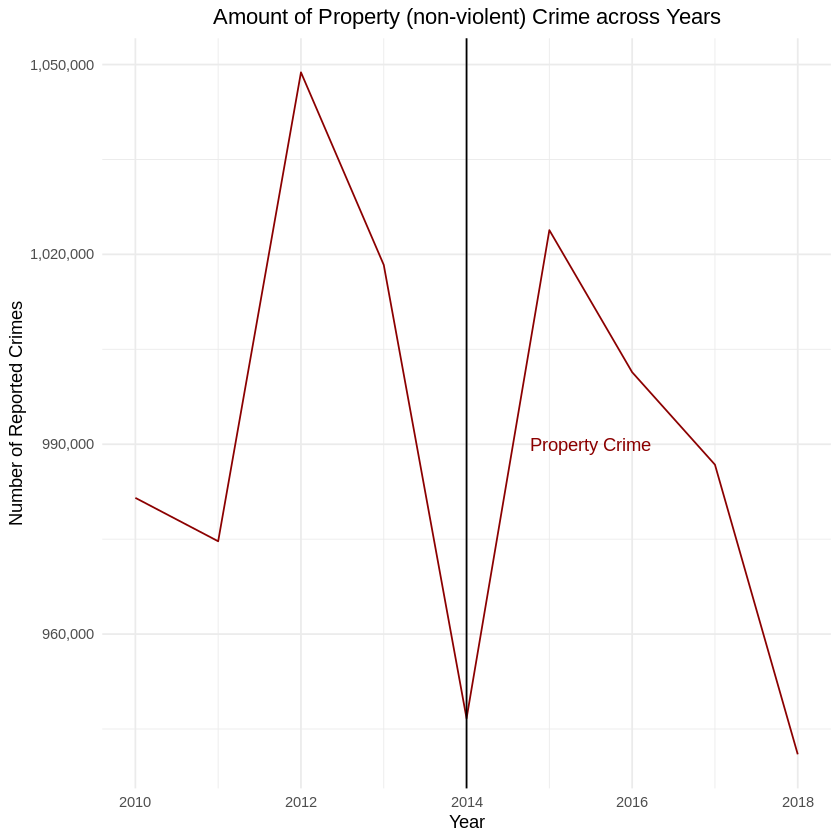

In [27]:
r = ggplot() +
    geom_line(data = grouped_by_year, aes(x = Year, y = Property_sum), color = "darkred") +
    geom_text(aes(x = 2015.5), y= 990000, label = "Property Crime", color = "darkred") +
    ggtitle("Amount of Property (non-violent) Crime across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Reported Crimes')

require(scales)
r + scale_y_continuous(labels = comma)

ggsave("propertycrime.png")
##ggplot(dsetnew, aes(x = Year)) +
 ## geom_line(aes(y = Violent_sum), color = "darkred") + 
  ##geom_line(aes(y = Property_sum), color = "steelblue") 

## Amount of Burglary, Vehicle, and LT (Larceny) Crimes##

In [28]:
grouped_by_type_of_property_crime <- dsetnew %>% group_by(Year) %>% summarise_at(vars(Burglary_sum, VehicleTheft_sum, LTtotal_sum), sum)
head(grouped_by_type_of_property_crime)

Year,Burglary_sum,VehicleTheft_sum,LTtotal_sum
<dbl>,<dbl>,<dbl>,<dbl>
2010,228672,152494,600357
2011,230334,147030,597302
2012,245601,168516,634647
2013,231909,165217,621207
2014,202556,151790,592336
2015,197189,170788,655851


Saving 6.67 x 6.67 in image


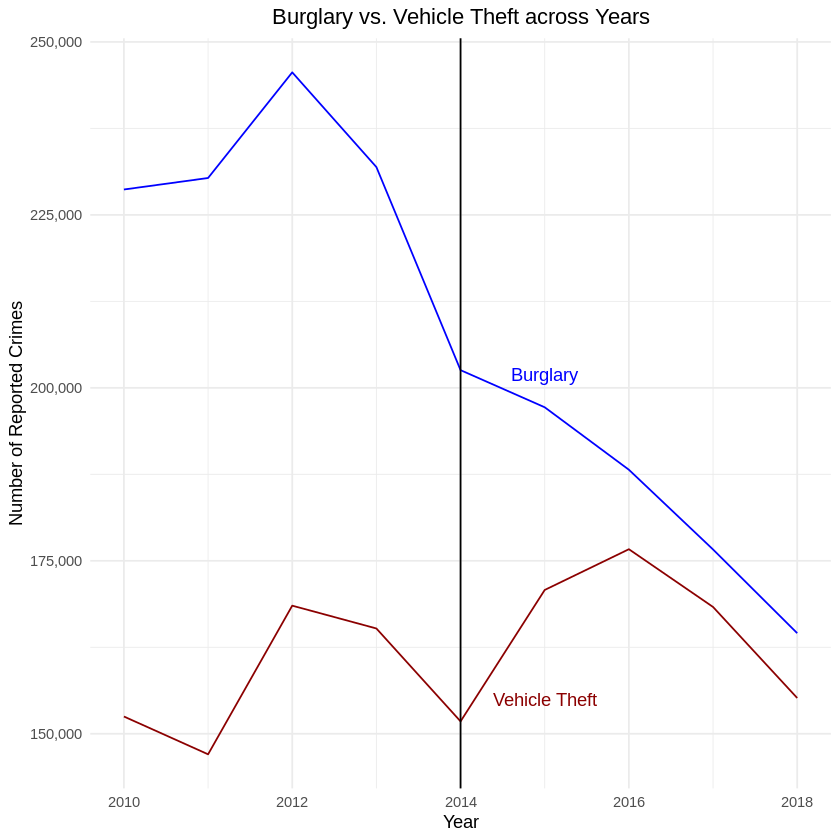

In [29]:
s = ggplot() +
    geom_line(data = grouped_by_type_of_property_crime, aes(x = Year, y = Burglary_sum), color = "blue") +
    geom_text(aes(x = 2015), y= 202000, label = "Burglary", color = "blue") +
    geom_line(data = grouped_by_type_of_property_crime, aes(x = Year, y = VehicleTheft_sum), color = "darkred") +
    geom_text(aes(x = 2015), y= 155000, label = "Vehicle Theft", color = "darkred") +
    ggtitle("Burglary vs. Vehicle Theft across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Reported Crimes')

require(scales)
s + scale_y_continuous(labels = comma)

ggsave("burglaryvehicle.png")

Saving 6.67 x 6.67 in image


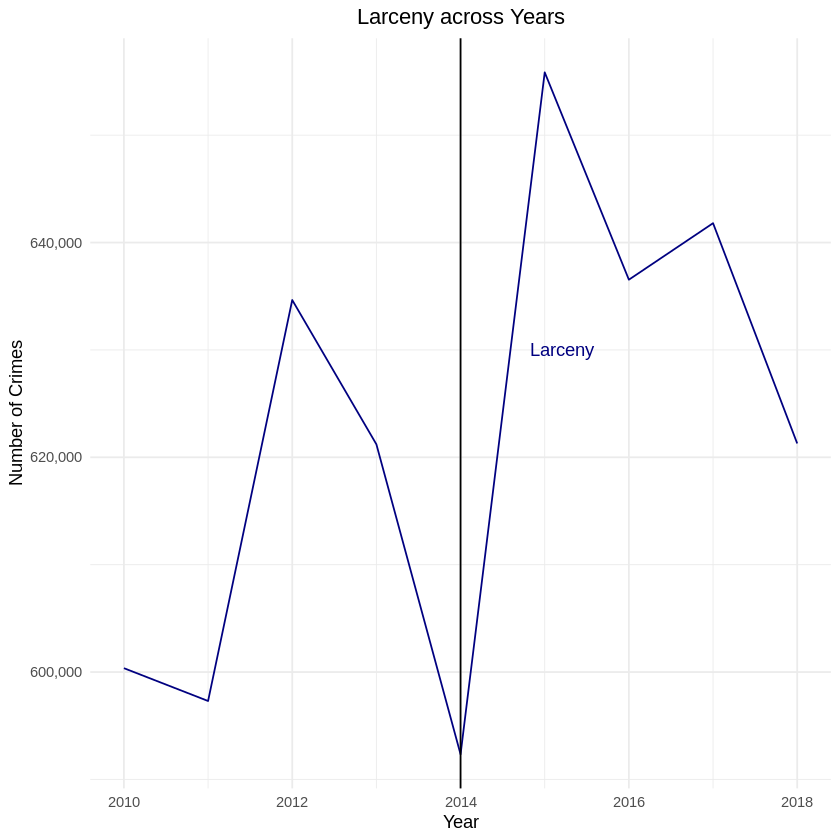

In [30]:
t = ggplot() + 
    geom_line(data = grouped_by_type_of_property_crime, aes(x = Year, y = LTtotal_sum), color = "navyblue") +
    geom_text(aes(x = 2015.2), y= 630000, label = "Larceny", color = "navyblue") +
    ggtitle("Larceny across Years") +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(xintercept = 2014) +
    xlab('Year') +
    ylab ('Number of Crimes')

require(scales)
t + scale_y_continuous(labels = comma)

ggsave("larcenycrime.png")